# STEAM GAMES ANALYSIS

## Introduction

Steam is a video game digital distribution service by Valve. It was launched as a standalone software client in September 2003 as a way for Valve to provide automatic updates for their games, and expanded to include games from third-party publishers. Steam has also expanded into an online web-based and mobile digital storefront. Steam offers digital rights management (DRM), server hosting, video streaming, and social networking services. It also provides the user with installation and automatic updating of games, and community features such as friends lists and groups, cloud storage, and in-game voice and chat functionality.

The software provides a freely available application programming interface (API) called Steamworks, which developers can use to integrate many of Steam's functions into their products, including in-game achievements, microtransactions, and support for user-created content through Steam Workshop. Though initially developed for use on Microsoft Windows operating systems, versions for macOS and Linux were later released. Mobile apps were also released for iOS, Android, and Windows Phone in the 2010s. The platform also offers a small selection of other content, including design software, hardware, game soundtracks, anime, and films.

The Steam platform is the largest digital distribution platform for PC gaming, holding around 75% of the market space in 2013. By 2017, users purchasing games through Steam totaled roughly US$4.3 billion, representing at least 18% of global PC game sales. By 2019, the service had over 34,000 games with over 95 million monthly active users. The success of Steam has led to the development of a line of Steam Machine microconsoles, which include the SteamOS operating system and Steam Controllers.

Source: https://en.wikipedia.org/wiki/Steam_(service)

## Data description

There are a lot of games in Steam platform, because of it there a lot of information about it.

Data:
+ Names of games - Actual names
+ Release dates of games
+ The language of games (is game supprts English language)
+ Developers of games
+ Platforms of games
+ Required ages of games
+ Categories of games
+ Genres of games
+ Tags of games
+ Count of achievments of games
+ Ratings of games
+ Playtimes of games
+ Count of owners of games
+ Prices of games

## Objectives

Plan:
+ Clear dataset
+ Get data from official website (https://store.steampowered.com/)
+ Data visualization (Charts, Graphs, Tables)
+ Analyze results
+ Conclusion

Questions for project:
+ Find developer that have highest rating
+ Find platform that more preferable for gaming
+ Find developer that gained most of cash from games
+ Find most owned and played game genre
+ Find most frequent word in names of games


## Used libraries

In [14]:
import time                            #To set timeouts for search
import pandas as pd                    #To work with datasets
import requests                        #To scrap data
from selenium import webdriver         #To work with web-site while scrapping
from bs4 import BeautifulSoup          #To orginize data after scrap
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import re
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
from itertools import chain
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.simplefilter("ignore")

## Working with dataset

The usen dataset was downloaded from kaggle.com. 

Url: https://www.kaggle.com/nikdavis/steam-store-games 

This dataset is open sorced and any user can user data from it

In [3]:
data = pd.read_csv('steam.csv', index_col=0)    #To read csv file with dataset
data.head()                                     #To show table

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## Checking all columns for null values
In this section I will find rows and columns with null values

In [38]:
check = data.notnull()   #Finding null values
check.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
20,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
30,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
40,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
50,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [39]:
check[~check['name']]    #Searching null values from dataframe

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,


In [40]:
check.all()              #Checking all columns for null

name                True
release_date        True
english             True
developer           True
publisher           True
platforms           True
required_age        True
categories          True
genres              True
steamspy_tags       True
achievements        True
positive_ratings    True
negative_ratings    True
average_playtime    True
median_playtime     True
owners              True
price               True
dtype: bool

There no null values in dataset

## Checking for duplicated data
In this section I like to find rows with same data

In [41]:
duplicate = data.duplicated()
duplicate

appid
10         False
20         False
30         False
40         False
50         False
           ...  
1065230    False
1065570    False
1065650    False
1066700    False
1069460    False
Length: 27075, dtype: bool

In [42]:
duplicate[duplicate].index.values

array([], dtype=int64)

There no duplicating data in dataset

## Scrapping data from official Website (https://store.steampowered.com/)
In this section I like to get data from official wesite of Steam

Here I got AppID, game name, recent reviews, overall reviews

In [43]:
temp = []                                                               #Creating necessary lists where we store data
names = []
p1 = []
p2 = []
p3 = []
p4 = []
for x in range(10, 1000, 10):                                          #The url of pages are incrementing by 10
    req = requests.get("https://store.steampowered.com/app/"+str(x))    #Requesting data from site
    soup = BeautifulSoup(req.content,'lxml')                            #Do data more readible
    name = soup.find_all("div", class_="apphub_AppName")                #Finding all "div" with name "apphub_AppName"
    t1 = soup.find_all("span", class_="responsive_hidden")              #Finding all "span" with name "responsive_hidden"
    t2 = soup.find_all("span", class_="game_review_summary")            #Finding all "span" with name "game_review_summary"
    if x % 1000 == 0:                                                   #Creating checkpoints to prevent data lost
        dic = {'name': names, 'Recent Reviews': p1, 'Recent Reviews Number': p2, 'Overall Reviews': p3, 'Overall Reviews Names': p4}    
        df = pd.DataFrame(dic)
        df.to_csv('checkpoint'+str(x)+'.csv') 
    if len(t2) == 0:                                                    #There some pages where no information
        continue                                                        #Because of it we just skip it
    if len(t1) == 0:
        continue
    if len(name) == 0:
        continue
    names.append(name[0].text)                                          #Adding necessary data to our lists
    p1.append(t2[0].text)
    p2.append(t1[0].text.replace('\r', '').replace('\t','').replace('\n','').replace('(','').replace(')',''))
    p3.append(t2[0].text)
    p4.append(t1[0].text.replace('\r', '').replace('\t','').replace('\n','').replace('(','').replace(')',''))
    req.close()                                                         #Close our requests
    print(name[0].text + " DONE; " + str(x))                            #To visualize checked pages

dic = {'name': names, 'Recent Reviews': p1, 'Recent Reviews Number': p2, 'Overall Reviews': p3, 'Overall Reviews Names': p4}    
df = pd.DataFrame(dic)
df.to_csv('GFG.csv')                                                    #Save all data to "GFG.csv"


Counter-Strike DONE; 10
Team Fortress Classic DONE; 20
Day of Defeat DONE; 30
Deathmatch Classic DONE; 40
Half-Life: Opposing Force DONE; 50
Ricochet DONE; 60
Half-Life DONE; 70
Counter-Strike: Condition Zero DONE; 80
Counter-Strike: Condition Zero DONE; 100
Half-Life: Blue Shift DONE; 130
Half-Life 2 DONE; 220
Counter-Strike: Source DONE; 240
Half-Life: Source DONE; 280
Day of Defeat: Source DONE; 300
Half-Life 2: Deathmatch DONE; 320
Half-Life 2: Lost Coast DONE; 340
Half-Life Deathmatch: Source DONE; 360
Half-Life 2: Episode One DONE; 380
Portal DONE; 400
Portal DONE; 410
Half-Life 2: Episode Two DONE; 420
Team Fortress 2 DONE; 440
Left 4 Dead DONE; 500
Left 4 Dead 2 DONE; 550
Dota 2 DONE; 570
Portal 2 DONE; 620
Alien Swarm DONE; 630
Counter-Strike: Global Offensive DONE; 730
Left 4 Dead 2 DONE; 870
Team Fortress 2 DONE; 960


After scrapping I must clear dataframe from null values and duplicated data

In [44]:
scrdata = pd.read_csv('GFG.csv', index_col=0)       #To read csv file with scrapped data 
scrdata.head()                                      #To show all data

,name,Recent Reviews,Recent Reviews Number,Overall Reviews,Overall Reviews Names
0,Counter-Strike,Overwhelmingly Positive,"1,272",Overwhelmingly Positive,"1,272"
1,Team Fortress Classic,Very Positive,46,Very Positive,46
2,Day of Defeat,Very Positive,32,Very Positive,32
3,Deathmatch Classic,Mostly Positive,13,Mostly Positive,13
4,Half-Life: Opposing Force,Overwhelmingly Positive,191,Overwhelmingly Positive,191


In [45]:
scrduplicate = scrdata.duplicated()           #Get duplicaded rows from dataframe
scrduplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29     True
dtype: bool

In [46]:
scrduplicate[scrduplicate].index.values       #Get rows of duplicated data

array([ 8, 19, 28, 29], dtype=int64)

In [47]:
scrdata = scrdata.drop(scrduplicate[scrduplicate].index.values)  #Remove duplicated values
scrdata.head()

,name,Recent Reviews,Recent Reviews Number,Overall Reviews,Overall Reviews Names
0,Counter-Strike,Overwhelmingly Positive,"1,272",Overwhelmingly Positive,"1,272"
1,Team Fortress Classic,Very Positive,46,Very Positive,46
2,Day of Defeat,Very Positive,32,Very Positive,32
3,Deathmatch Classic,Mostly Positive,13,Mostly Positive,13
4,Half-Life: Opposing Force,Overwhelmingly Positive,191,Overwhelmingly Positive,191


In [48]:
scrcheck = scrdata.notnull()   #Finding null values
scrcheck.head()

,name,Recent Reviews,Recent Reviews Number,Overall Reviews,Overall Reviews Names
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True


In [49]:
scrcheck.all() #Getting columns with null values

name                     True
Recent Reviews           True
Recent Reviews Number    True
Overall Reviews          True
Overall Reviews Names    True
dtype: bool

After cleaning I connect dataset with dataframe that I scrapped

In [50]:
pd.merge(data,scrdata,on='name').head()   #Joining scrapped dataframe with dataset from Kaggle

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Recent Reviews,Recent Reviews Number,Overall Reviews,Overall Reviews Names
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,124534,3339,17612,317,10000000-20000000,7.19,Overwhelmingly Positive,"1,272",Overwhelmingly Positive,"1,272"
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,3318,633,277,62,5000000-10000000,3.99,Very Positive,46,Very Positive,46
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,3416,398,187,34,5000000-10000000,3.99,Very Positive,32,Very Positive,32
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,1273,267,258,184,5000000-10000000,3.99,Mostly Positive,13,Mostly Positive,13
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,5250,288,624,415,5000000-10000000,3.99,Overwhelmingly Positive,191,Overwhelmingly Positive,191


## Solutions for problems

### Q1 Find developer that have highest rating
First of all I should get necessary columns

In [51]:
subdf1 = data[['developer','positive_ratings','negative_ratings']]  #Get 3 columns from main dataframe
subdf1.head()

,developer,positive_ratings,negative_ratings
appid,,,
10,Valve,124534,3339
20,Valve,3318,633
30,Valve,3416,398
40,Valve,1273,267
50,Gearbox Software,5250,288


I get rating by substracting negative rating from positive rating

In [52]:
rating = subdf1['positive_ratings'] - subdf1['negative_ratings']    #Get subtraction of 2 and 3 columns
subdf2 = subdf1
subdf2["rating"] = rating                                           #Add rating into sub dataframe
subdf2.head()

,developer,positive_ratings,negative_ratings,rating
appid,,,,
10,Valve,124534,3339,121195
20,Valve,3318,633,2685
30,Valve,3416,398,3018
40,Valve,1273,267,1006
50,Gearbox Software,5250,288,4962


I groupped all apps by their developer

In [53]:
subdf2.groupby(['developer']).sum().head()      #Group by rows and sum another column values

,positive_ratings,negative_ratings,rating
developer,,,
#workshop,653,29,624
'What Day is it?' Games,2,0,2
(STCG) Smoker The Car Game,2,2,0
+7 Software,41,5,36
"+Mpact Games, LLC.",74,16,58


I ordered grouped dataframe

In [54]:
subdf2.groupby(['developer']).sum().sort_values(by=['rating'],ascending=0).head(10)        #Sort rows

,positive_ratings,negative_ratings,rating
developer,,,
Valve;Hidden Path Entertainment,2644404,402313,2242091
Valve,2253475,220682,2032793
Facepunch Studios,584310,70193,514117
Bethesda Game Studios,472969,88805,384164
Ubisoft Montreal,362333,79882,282451
Smartly Dressed Games,292574,31482,261092
CD PROJEKT RED,268423,14112,254311
OVERKILL - a Starbreeze Studio.,308657,56523,252134
Re-Logic,255600,7797,247803


In [55]:
fdf1 = subdf2.groupby(['developer']).sum().sort_values(by=['rating'],ascending=0).head(10)
fdf1["rank"] = fdf1["rating"].rank(ascending = 0)
fdf1

,positive_ratings,negative_ratings,rating,rank
developer,,,,
Valve;Hidden Path Entertainment,2644404,402313,2242091,1.0
Valve,2253475,220682,2032793,2.0
Facepunch Studios,584310,70193,514117,3.0
Bethesda Game Studios,472969,88805,384164,4.0
Ubisoft Montreal,362333,79882,282451,5.0
Smartly Dressed Games,292574,31482,261092,6.0
CD PROJEKT RED,268423,14112,254311,7.0
OVERKILL - a Starbreeze Studio.,308657,56523,252134,8.0
Re-Logic,255600,7797,247803,9.0


In [56]:
fdf1['Dev'] = fdf1.index
fdf1

,positive_ratings,negative_ratings,rating,rank,Dev
developer,,,,,
Valve;Hidden Path Entertainment,2644404,402313,2242091,1.0,Valve;Hidden Path Entertainment
Valve,2253475,220682,2032793,2.0,Valve
Facepunch Studios,584310,70193,514117,3.0,Facepunch Studios
Bethesda Game Studios,472969,88805,384164,4.0,Bethesda Game Studios
Ubisoft Montreal,362333,79882,282451,5.0,Ubisoft Montreal
Smartly Dressed Games,292574,31482,261092,6.0,Smartly Dressed Games
CD PROJEKT RED,268423,14112,254311,7.0,CD PROJEKT RED
OVERKILL - a Starbreeze Studio.,308657,56523,252134,8.0,OVERKILL - a Starbreeze Studio.
Re-Logic,255600,7797,247803,9.0,Re-Logic


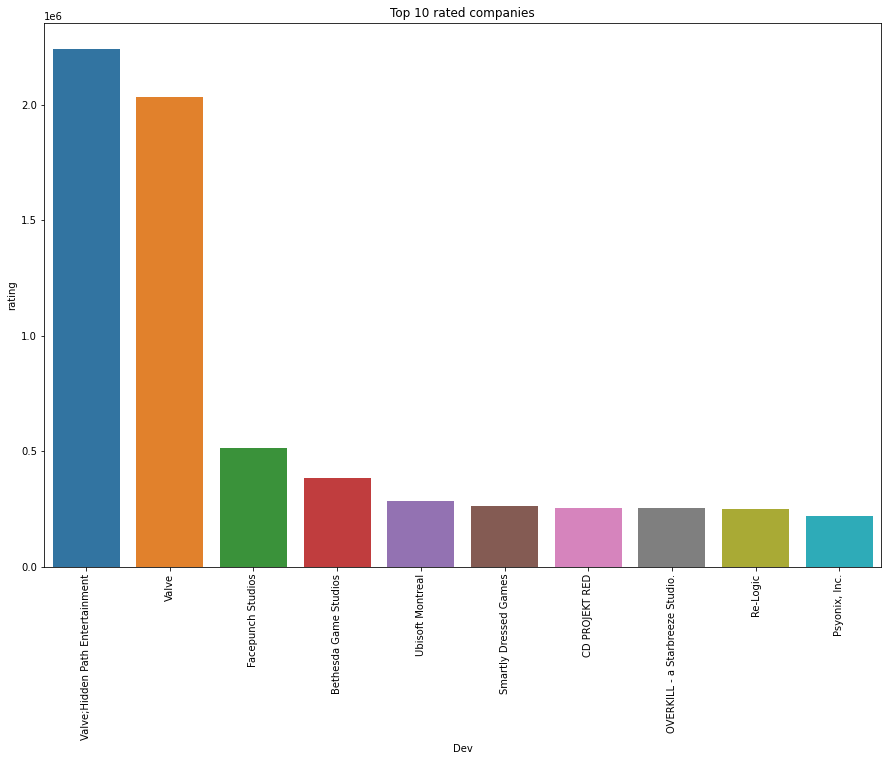

In [57]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Dev", y="rating", data=fdf1,  ax=ax)
ax.set_title("Top 10 rated companies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

It found that Valve and Hidden Path Entertainment rating is highest

### Q2 Find platform that more preferable for gaming

Select necessary columns from dataframe

In [58]:
subdf1 = data[['release_date','platforms']]  #Get 3 columns from main dataframe
subdf1.head()

,release_date,platforms
appid,,
10,2000-11-01,windows;mac;linux
20,1999-04-01,windows;mac;linux
30,2003-05-01,windows;mac;linux
40,2001-06-01,windows;mac;linux
50,1999-11-01,windows;mac;linux


Divide platofrms into different rows

In [59]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(';')))

lens = subdf1['platforms'].str.split(';').map(len)

subdf1 = pd.DataFrame({'release_date': np.repeat(subdf1['release_date'], lens),
                    'platforms': chainer(subdf1['platforms'])})

subdf1.head()

,release_date,platforms
appid,,
10,2000-11-01,windows
10,2000-11-01,mac
10,2000-11-01,linux
20,1999-04-01,windows
20,1999-04-01,mac


Get count of all games per platform

In [60]:
subdf1.groupby(['platforms']).count().head() 

,release_date
platforms,
linux,5235
mac,8066
windows,27070


Do release date index to group it in future

In [61]:
subdf1.index = pd.to_datetime(subdf1['release_date'])
subdf1.head()

,release_date,platforms
release_date,,
2000-11-01,2000-11-01,windows
2000-11-01,2000-11-01,mac
2000-11-01,2000-11-01,linux
1999-04-01,1999-04-01,windows
1999-04-01,1999-04-01,mac


Group it by platform and years

In [62]:
subdf1 = subdf1.groupby('platforms').resample('Y').count()
subdf1.head()

release_date  platforms
platforms release_date                         
linux     1998-12-31               1          1
          1999-12-31               2          2
          2000-12-31               2          2
          2001-12-31               2          2
          2002-12-31               0          0

Do colomn names normal and reset indexes to plot the graph

In [63]:
subdf1 = subdf1.rename(columns={'platforms':'count'})
subdf1 = subdf1.drop(columns=['release_date'])
subdf1 = subdf1.reset_index()

subdf1.head()

,platforms,release_date,count
0,linux,1998-12-31,1
1,linux,1999-12-31,2
2,linux,2000-12-31,2
3,linux,2001-12-31,2
4,linux,2002-12-31,0


Plot the graph

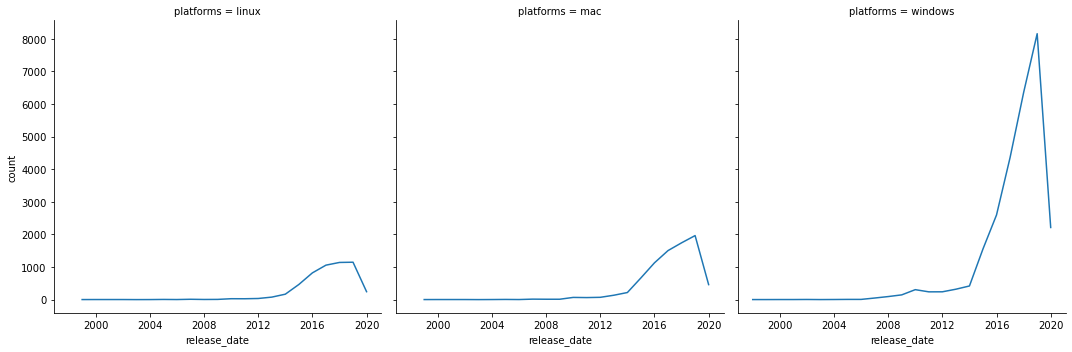

In [64]:
sns.relplot(data=subdf1, kind="line",
    x="release_date", y="count", 
    col="platforms"
);

To sum up, it is seems that windows platforms is most prferable for gaming

### Q3 Find developer that gained most of cash from games

Get necessary columns from dataframe

In [71]:
subdf1 = data[['publisher','owners','price']]  #Get 3 columns from main dataframe
subdf1.head()

,publisher,owners,price
appid,,,
10,Valve,10000000-20000000,7.19
20,Valve,5000000-10000000,3.99
30,Valve,5000000-10000000,3.99
40,Valve,5000000-10000000,3.99
50,Valve,5000000-10000000,3.99


Divide owners column into 2 columns, becaгse there two values separated by '-'

In [72]:
subdf1[['First','Last']] = subdf1.owners.str.split("-",expand=True)
subdf1.head()

,publisher,owners,price,First,Last
appid,,,,,
10,Valve,10000000-20000000,7.19,10000000,20000000
20,Valve,5000000-10000000,3.99,5000000,10000000
30,Valve,5000000-10000000,3.99,5000000,10000000
40,Valve,5000000-10000000,3.99,5000000,10000000
50,Valve,5000000-10000000,3.99,5000000,10000000


Get total earning of each game by multyplying number of owners by price

Drop unecessary columns

In [73]:
subdf1 = subdf1.drop(columns=['First'])
subdf1 = subdf1.drop(columns=['owners'])
subdf1['Total earnings'] = subdf1['Last'].astype(float) * subdf1['price']
subdf1.head()

,publisher,price,Last,Total earnings
appid,,,,
10,Valve,7.19,20000000,143800000.0
20,Valve,3.99,10000000,39900000.0
30,Valve,3.99,10000000,39900000.0
40,Valve,3.99,10000000,39900000.0
50,Valve,3.99,10000000,39900000.0


Group by all games with same publisher and get sum of Total earning

Get avarage price of each game of each publisher

In [74]:
subdf2 = subdf1.groupby(['publisher']).sum()
subdf2['Average price'] = subdf1.groupby(['publisher']).mean()['price']
subdf2.head()

,price,Total earnings,Average price
publisher,,,
,8.57,195100.0,1.428333
Milestone S.r.l.,6.99,139800.0,6.990000
AFBIK Studio,2.37,47400.0,0.790000
AYE Technology,2.79,55800.0,2.790000
Anea_Duo_Dev,7.19,143800.0,7.190000


Reset index of final dataframe to do plotting much easier

In [75]:
subdf2 = subdf2.reset_index().sort_values(by=['Total earnings'],ascending=0).head(10)
subdf2

,publisher,price,Total earnings,Average price
8755,PUBG Corporation,26.99,2.699000e+09,26.990000
12625,Valve,134.39,1.829080e+09,4.479667
12414,Ubisoft,1829.33,1.768194e+09,16.480450
8805,Paradox Interactive,766.16,1.193654e+09,13.930182
1416,Bethesda Softworks,509.70,1.170869e+09,14.562857
10196,SEGA,1038.29,9.662872e+08,13.311410
10032,Rockstar Games,169.87,8.719948e+08,11.324667
145,2K;Aspyr (Mac);Aspyr (Linux),149.95,8.596800e+08,29.990000
3648,Electronic Arts,397.68,8.490235e+08,12.427500
1961,"CAPCOM Co., Ltd.",283.89,7.363413e+08,23.657500


Plotting the graph

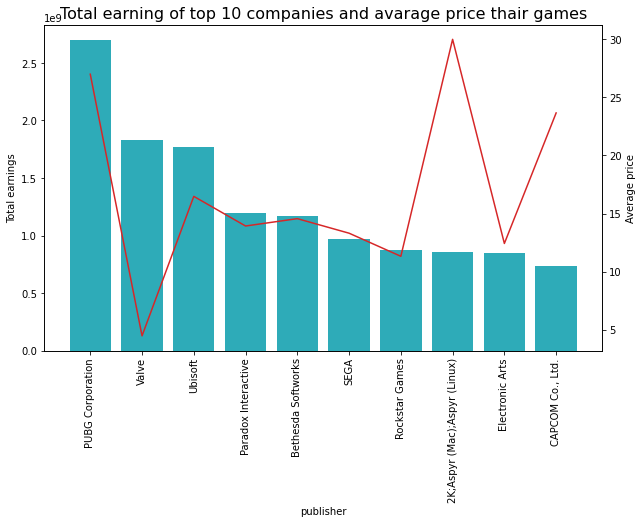

In [76]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Total earning of top 10 companies and avarage price thair games', fontsize=16)
ax1 = sns.barplot(x="publisher", y="Total earnings", data=subdf2, color='tab:cyan')
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="publisher", y="Average price", data=subdf2, sort=False, color='tab:red')
plt.show()

In graph above we can see top 10 companies by their earnings and avarage price their games

It seems that "PUBG Corporation" in first place

### Q4 Find most owned game genre

Get neccesary columns

In [77]:
subdf1 = data[['genres','owners','average_playtime']]
subdf1.head()

,genres,owners,average_playtime
appid,,,
10,Action,10000000-20000000,17612
20,Action,5000000-10000000,277
30,Action,5000000-10000000,187
40,Action,5000000-10000000,258
50,Action,5000000-10000000,624


Divide owners column into 2 columns, becaгse there two values separated by '-'

Drop unecessary columns

In [78]:
subdf1[['First','Owned']] = subdf1.owners.str.split("-",expand=True)
subdf1 = subdf1.drop(columns=['First'])
subdf1 = subdf1.drop(columns=['owners'])
subdf1.head()

,genres,average_playtime,Owned
appid,,,
10,Action,17612,20000000
20,Action,277,10000000
30,Action,187,10000000
40,Action,258,10000000
50,Action,624,10000000


Divide genres into different rows

In [79]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(';')))

lens = subdf1['genres'].str.split(';').map(len)

subdf1 = pd.DataFrame({'average_playtime': np.repeat(subdf1['average_playtime'], lens),
                    'genres': chainer(subdf1['genres']),
                    'Owned': np.repeat(subdf1['Owned'], lens)})
subdf1['Owned'] = pd.to_numeric(subdf1['Owned'])
subdf1.head()

,average_playtime,genres,Owned
appid,,,
10,17612,Action,20000000
20,277,Action,10000000
30,187,Action,10000000
40,258,Action,10000000
50,624,Action,10000000


Get sum of owners and avarage time of play of each genre

In [80]:
subdf2 = subdf1.groupby(['genres']).sum()
subdf2 = subdf2.drop(columns=['average_playtime'])
subdf2['Average time'] = subdf1.groupby(['genres']).mean()['average_playtime']
subdf2['Total played time'] = subdf2['Average time'] * subdf2['Owned']
subdf2.reset_index().sort_values(by=['Owned'],ascending=0)

,genres,Owned,Average time,Total played time
1,Action,3280610000,144.016634,4.724624e+11
13,Indie,2097430000,112.836105,2.366658e+11
2,Adventure,1556980000,151.656699,2.361264e+11
10,Free to Play,1385920000,554.437793,7.684064e+11
23,Strategy,1071090000,193.130170,2.068598e+11
17,RPG,972400000,276.985850,2.693410e+11
5,Casual,805250000,85.073751,6.850564e+10
20,Simulation,746320000,154.240855,1.151130e+11
14,Massively Multiplayer,608370000,725.484094,4.413628e+11
8,Early Access,229690000,81.300948,1.867401e+10


Plotting the graphs

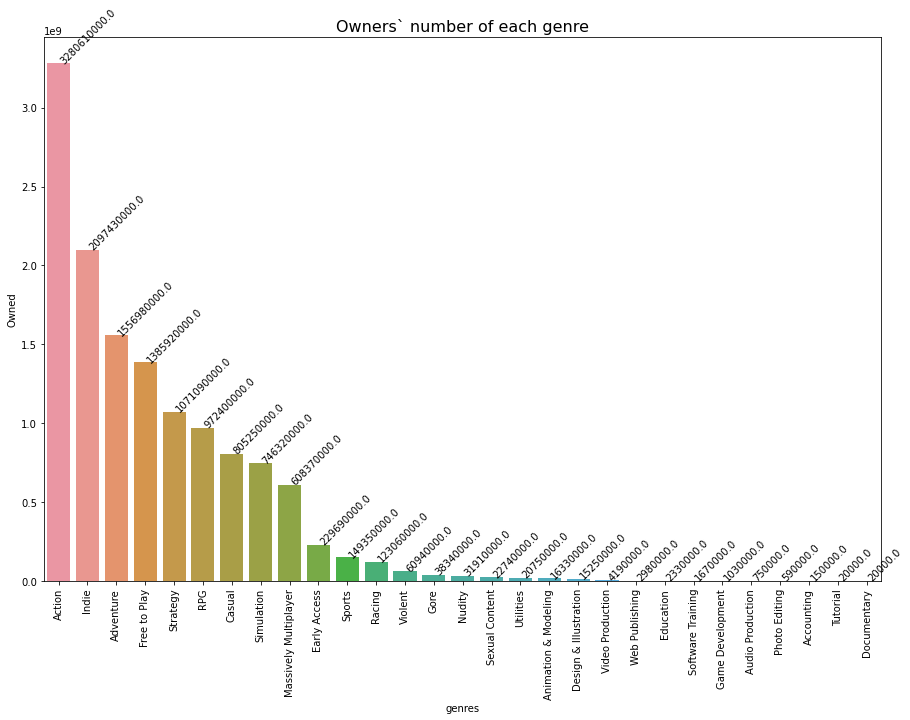

In [81]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="genres", y="Owned", data=subdf2.reset_index().sort_values(by=['Owned'],ascending=0), ax=ax)
ax.set_title('Owners` number of each genre', fontsize=16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   xytext = (0, 0), 
                   textcoords = 'offset points',
                   rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

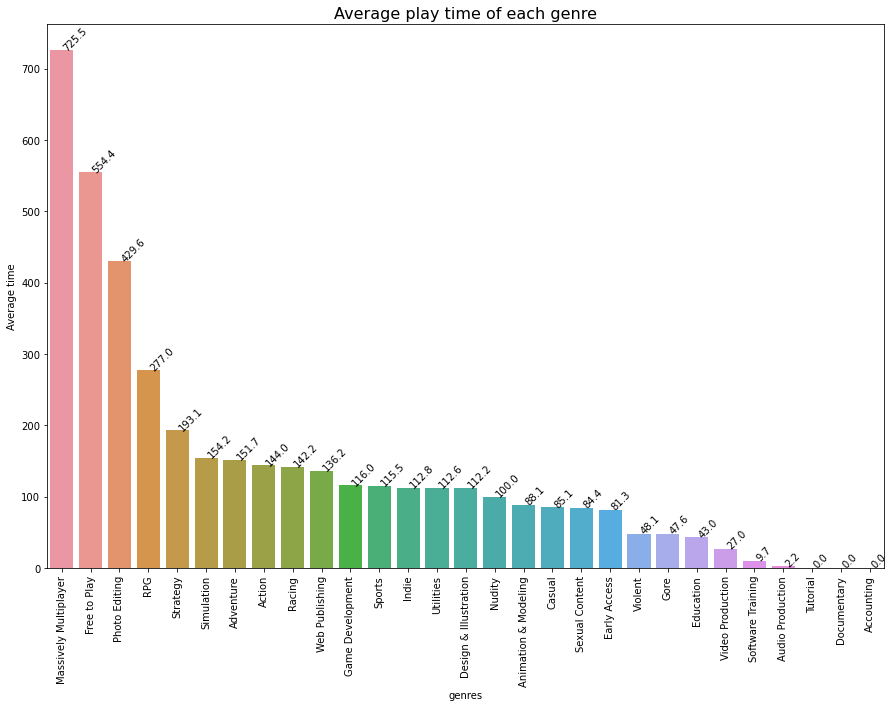

In [82]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="genres", y="Average time", data=subdf2.reset_index().sort_values(by=['Average time'],ascending=0), ax=ax)
ax.set_title('Average play time of each genre', fontsize=16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   xytext = (0, 0), 
                   textcoords = 'offset points',
                   rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

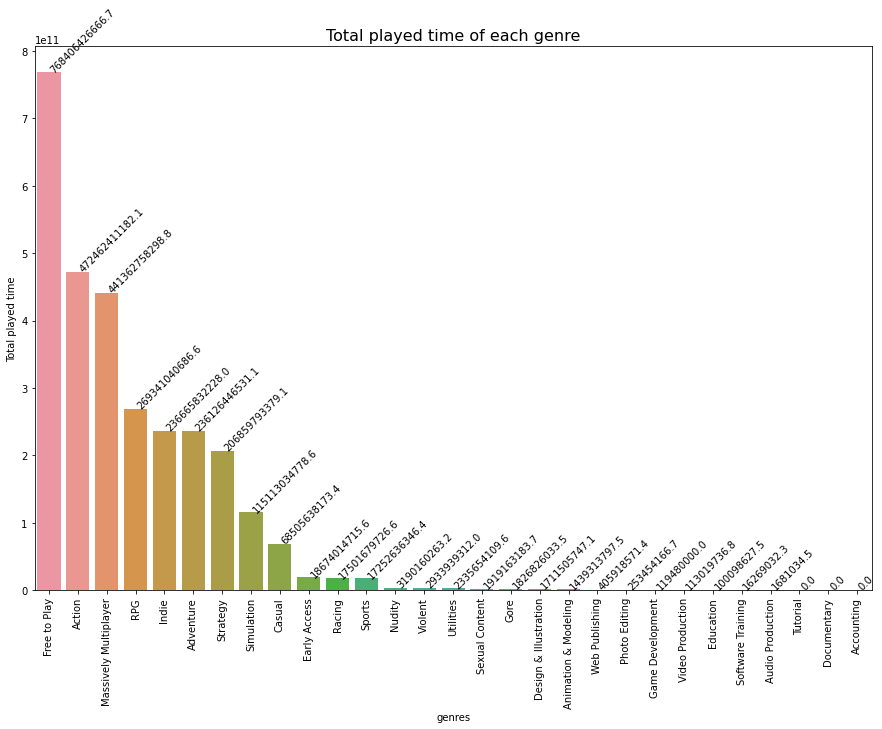

In [83]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="genres", y="Total played time", data=subdf2.reset_index().sort_values(by=['Total played time'],ascending=0), ax=ax)
ax.set_title('Total played time of each genre', fontsize=16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   xytext = (0, 0), 
                   textcoords = 'offset points',
                   rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

It seems that most purchased game are action games, however the total played time of free to play games are much more than others`

### Q5 Find most frequent word in names of games

Get count of all words in names of games

In [84]:
dfc = pd.DataFrame(Counter(" ".join(data["name"].str.lower()).split()).most_common(100),columns=['Word','Count'])
dfc.head()

,Word,Count
0,the,3905
1,of,2693
2,-,1166
3,vr,923
4,2,672


Plotting the graph of frequency of top 50 common words

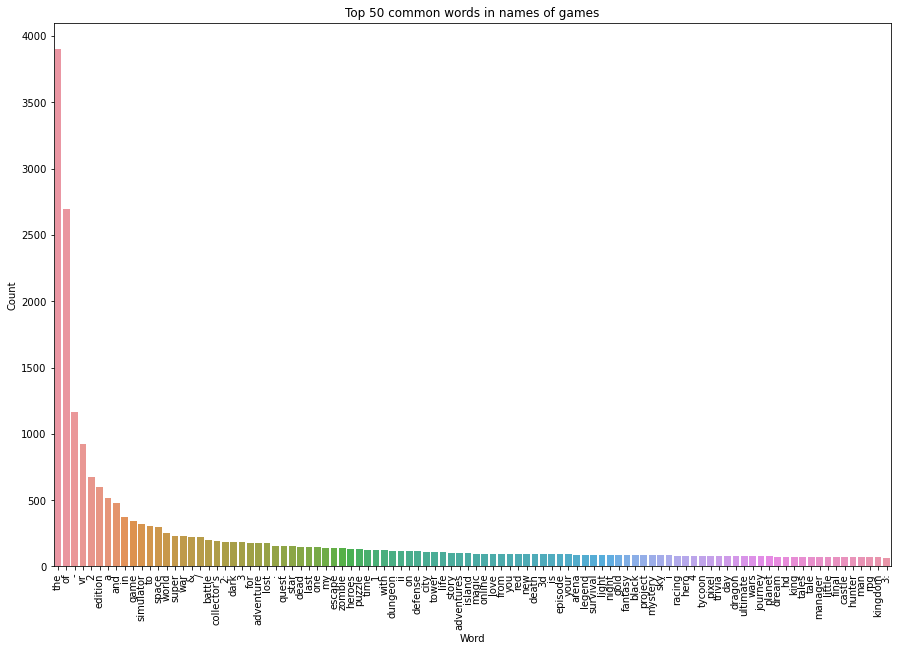

In [85]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Word", y="Count", data=dfc,  ax=ax)
ax.set_title("Top 50 common words in names of games")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Creating word cloud from those word, however in this cloud we dont have articles, symbols and numbers

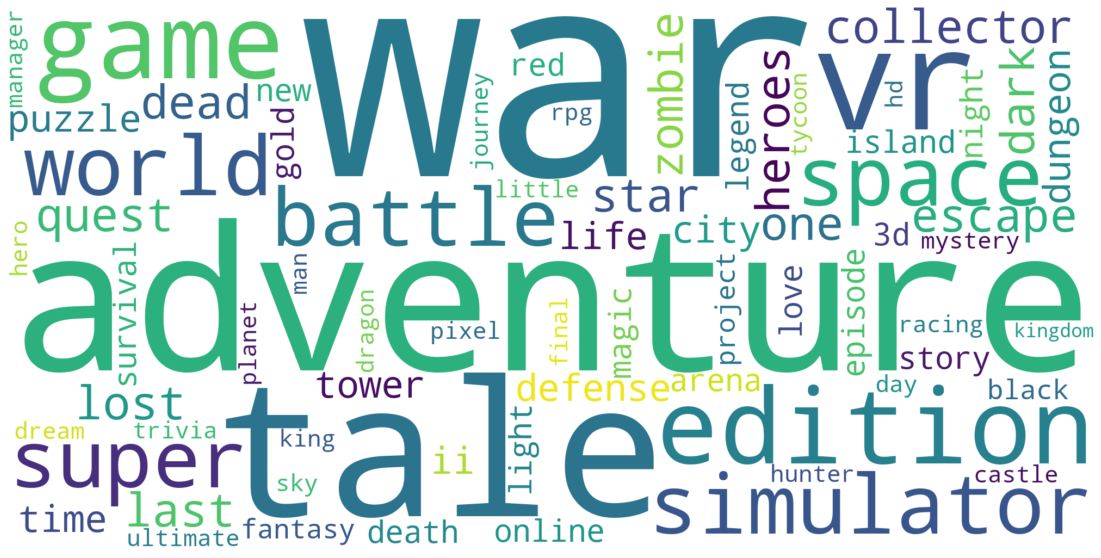

In [86]:
text = dfc.Word.str.cat(sep=' ')
wordcloud = WordCloud(max_words=100, background_color="white", width = 2000, height = 1000).generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Getting logotype of steam to draw word cloud with this design

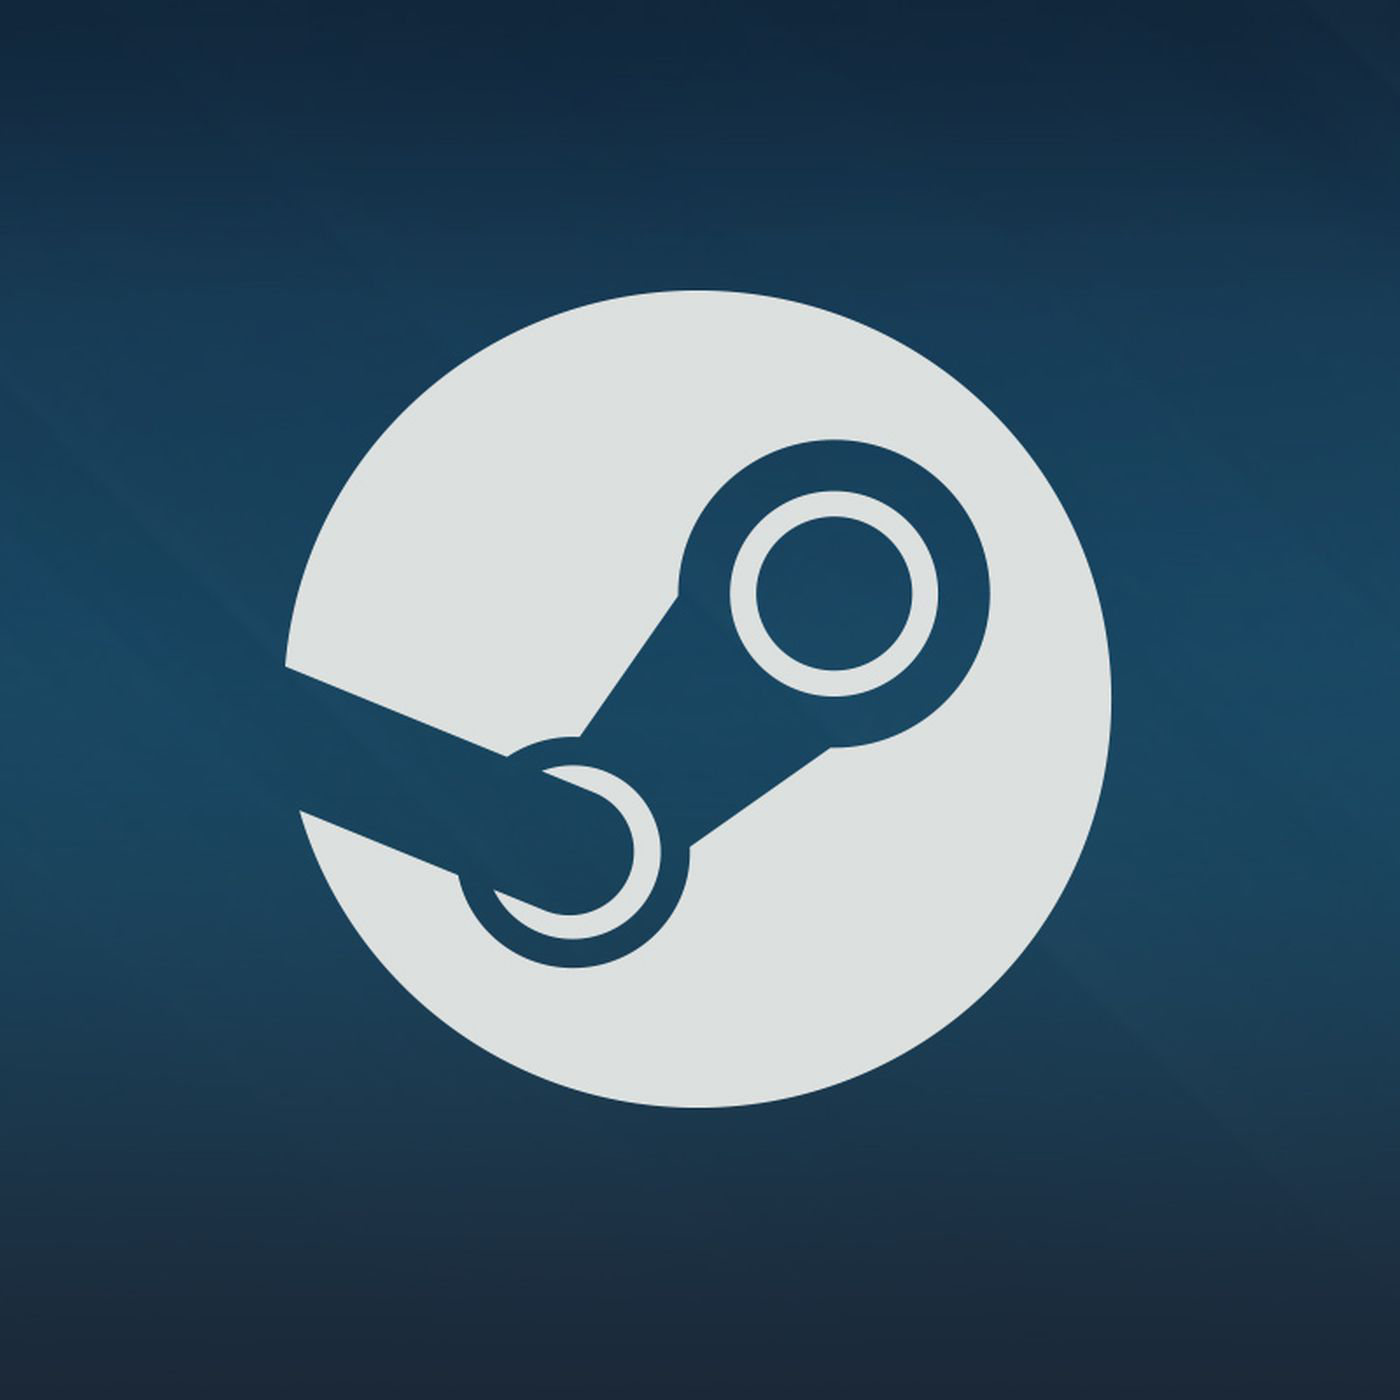

In [87]:
Image.open("logo.jpg")

Plotting the word cloud with this words

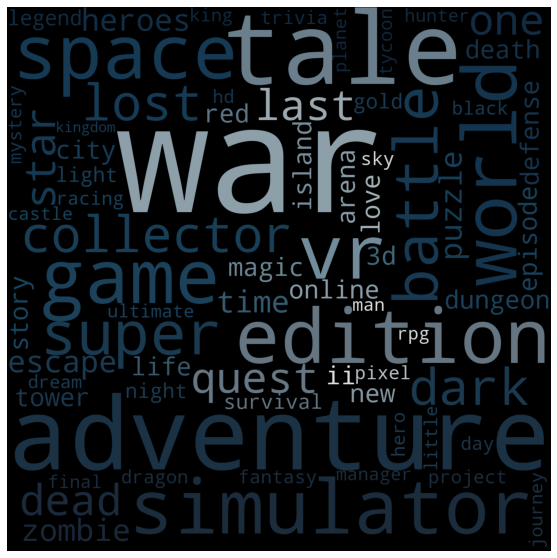

In [88]:
char_mask = np.array(Image.open("logo.jpg"))
image_colors = ImageColorGenerator(char_mask)
wc = WordCloud(background_color="black", max_words=100, width=2000, height=1000, mask=char_mask, random_state=1).generate(text)
# to recolour the image
plt.figure( figsize=(20,10) )
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

To sum up this question, the most frequent words are articles, but most VR.

In my opinion this word is most frequent, because last time majority of developers creating games for VR helmets.

## Correlation matrix for dataframe

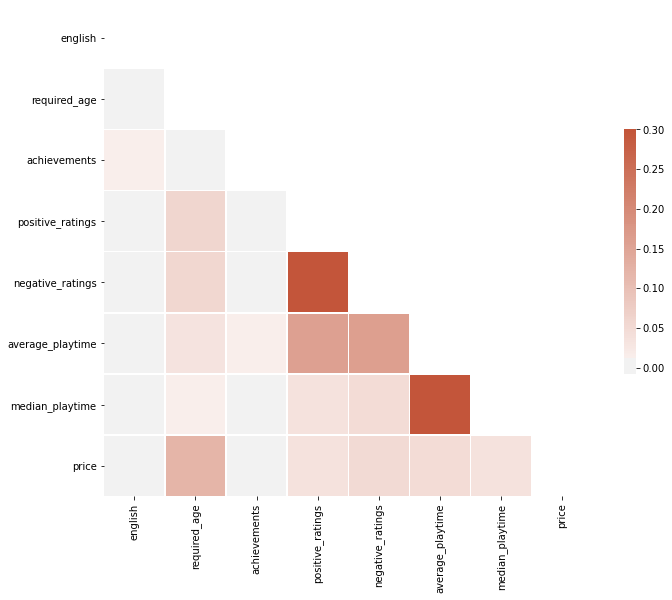

In [21]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

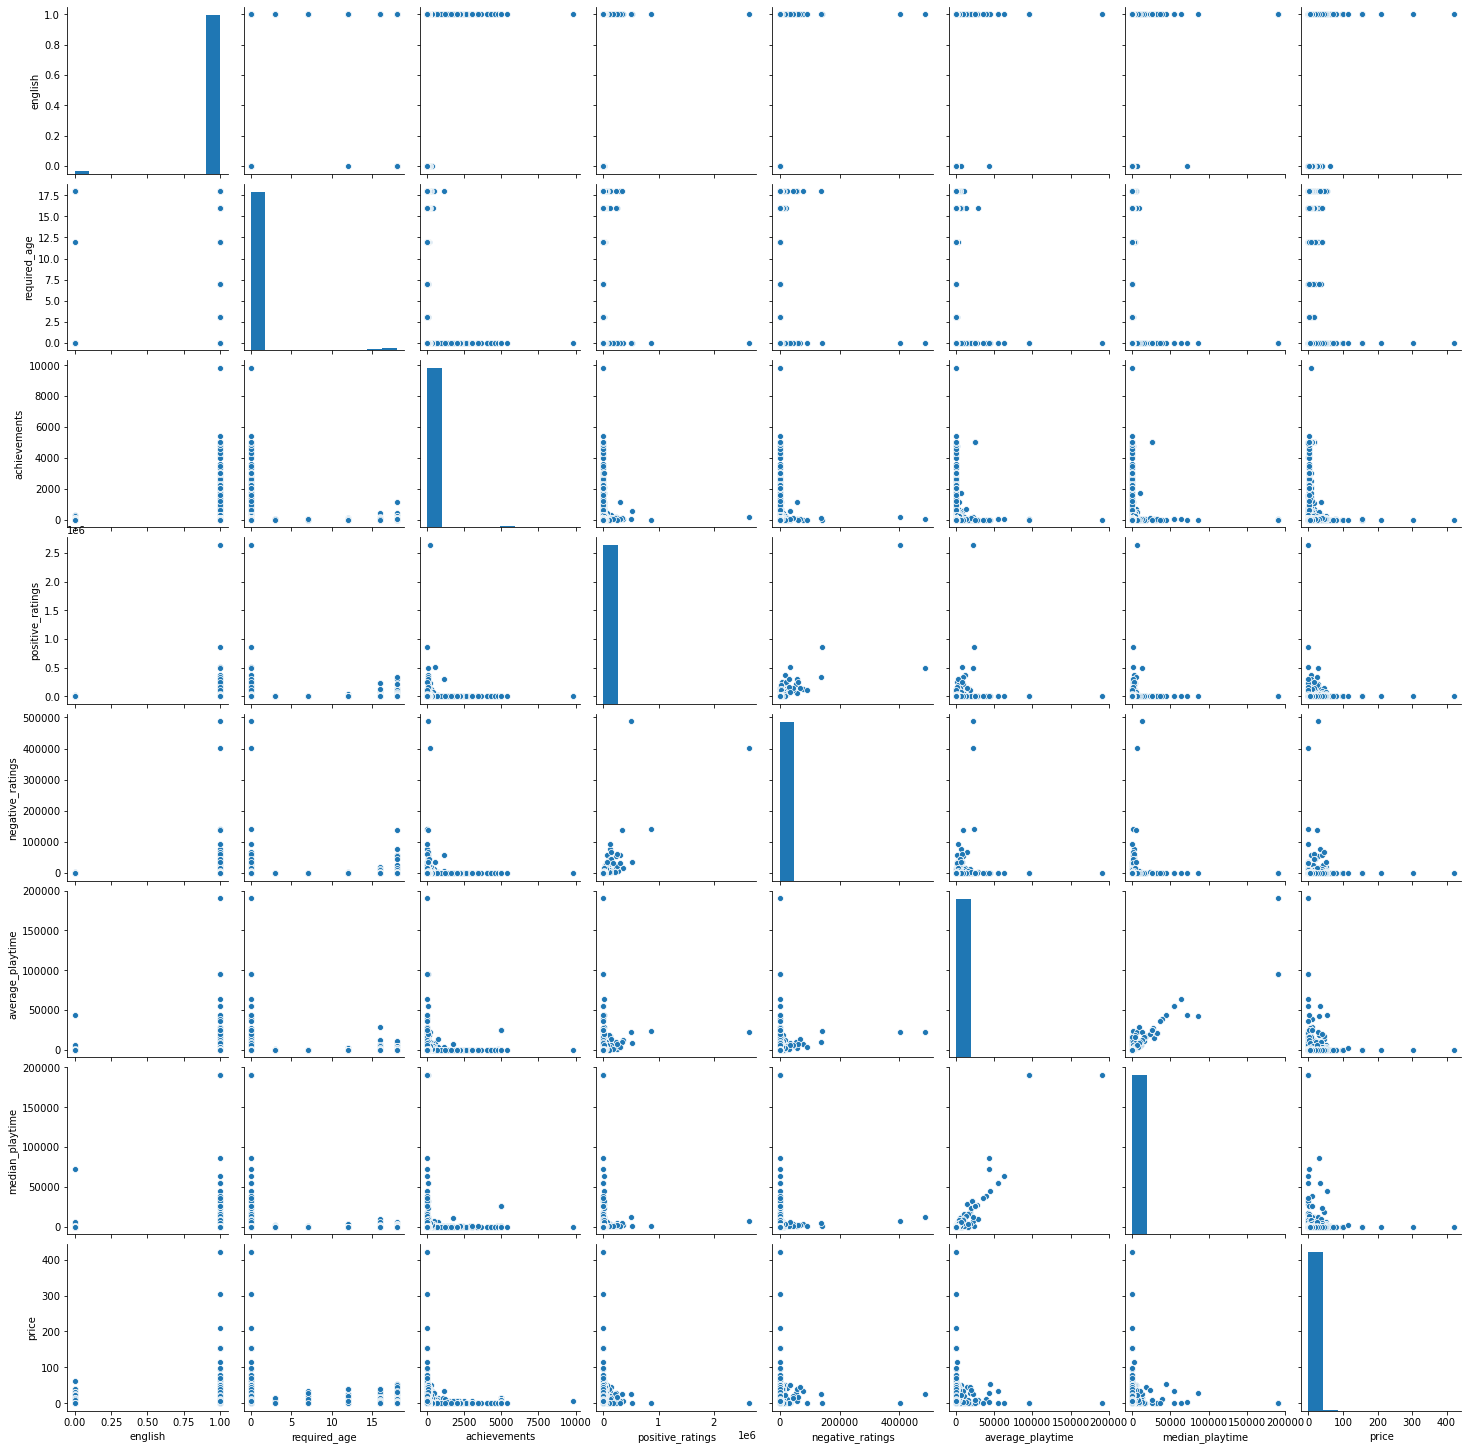

In [22]:
sns.pairplot(data)

## Conclusion

After analysis above, it is possible to conclude several information about Steam Games

1. It found that Valve and Hidden Path Entertainment rating is highest
2. Windows platforms is most prferable for gaming
3. "PUBG Corporation" in first place in total earning among other companies
4. Most purchased game are action games, however the total played time of free to play games are much more than others`
5. The most frequent words are articles, but most VR.